In [1]:
import os
root = os.getcwd()
print(root)

/Users/kinbunhua/cs521/group


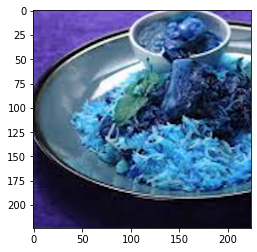

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = root + "/Nasi"

CATEGORIES = ["Nasi briyani", "Nasi kerabu", "Nasi tomato", "Nasi lemuni", "Nasi dagang", "Nasi minyak"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

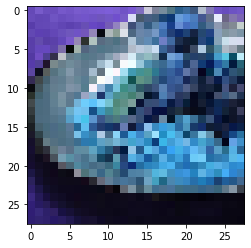

In [3]:
IMG_SIZE = 28

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 300/300 [00:00<00:00, 349.53it/s]

1824


In [5]:
import random

random.shuffle(training_data)

In [6]:
def one_hot(y, nb_classes):
    """ one_hot

    向量转one-hot

    Arguments:
        y: 带转换的向量
        nb_classes: int 类别数

    """
    y = np.asarray(y, dtype='int32')
    if not nb_classes:
        nb_classes = np.max(y) + 1
    Y = np.zeros((nb_classes, len(y)))
    Y[y, np.arange(len(y))] = 1.
    return Y

In [7]:
X = []
y = []
INPUT_SIZE = IMG_SIZE * IMG_SIZE * 3
for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, INPUT_SIZE)/255.0
y = one_hot(y, len(CATEGORIES)).T
#y = np.array(y).reshape(-1)
print(X.shape, y.shape)
#split data into train and test sets 

#import train_test_split function
from sklearn.model_selection import train_test_split

#split the dataset into training and test sets 
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X.shape, y.shape)

(1824, 2352) (1824, 6)
(1459, 2352) (1459, 6)


In [8]:
print(len(CATEGORIES))
print(y[0])
print(y[1])

6
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
